Introduction

# 1 Example Data

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [4]:
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [6]:
print(digits.target)

[0 1 2 ..., 8 9 8]


# 2 Learning and predict

In [8]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
clf.predict(digits.data[-1:])

array([8])

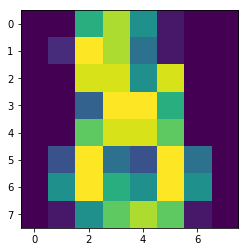

In [18]:
import numpy as np
import matplotlib.pyplot as plt
img = digits.data[-1:].reshape((8,8))
plt.imshow(img)
plt.show()

# 3 Model persistence

In [19]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
import pickle
s = pickle.dumps(clf)
clf2= pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [21]:
y[0]

0

# 4 Convertions

In [23]:
import numpy as np
from sklearn import random_projection
rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
X.dtype

dtype('float32')

In [25]:
transformer = random_projection.GaussianRandomProjection()
x_new = transformer.fit_transform(X)
x_new.dtype

dtype('float64')

# 5 multiclass

In [28]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
X = [[1,2], [2,4], [4,5], [3,2], [3,1]]
y = [0, 0, 1, 1, 2]
classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [29]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])